In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [90]:
fst = pd.read_csv('../Data/Meta/fst_pop.csv',names=['chrom','pop1','pop2','fst', 'se', 'aa', 'ds'], sep = '\t').drop(columns=["aa","ds"])

In [91]:
fst

,chrom,pop1,pop2,fst,se
0,"3L,3R",CO,GM-1,0.010,0.0006
1,"3L,3R",GM-1,CO,0.010,0.0006
2,"3L,3R",CO,GM-2,0.028,0.0014
3,"3L,3R",GM-2,CO,0.028,0.0014
4,"3L,3R",CO,GW-1,0.018,0.0012
5,"3L,3R",GW-1,CO,0.018,0.0012
6,"3L,3R",GA,GM-1,0.035,0.0018
7,"3L,3R",GM-1,GA,0.035,0.0018
8,"3L,3R",GA,GM-2,0.032,0.0010
9,"3L,3R",GM-2,GA,0.032,0.0010


In [92]:
len (fst)

20

In [93]:
fest = fst.drop_duplicates()

In [94]:
len(fest)

20

In [95]:
fst.fst = pd.to_numeric(fst['fst'], errors='coerce')

In [96]:
pd.to_numeric(fst['fst'], errors='coerce')

0     0.010
1     0.010
2     0.028
3     0.028
4     0.018
5     0.018
6     0.035
7     0.035
8     0.032
9     0.032
10    0.027
11    0.027
12    0.033
13    0.033
14    0.020
15    0.009
16    0.020
17    0.009
18    0.009
19    0.009
Name: fst, dtype: float64

In [97]:
fst

,chrom,pop1,pop2,fst,se
0,"3L,3R",CO,GM-1,0.010,0.0006
1,"3L,3R",GM-1,CO,0.010,0.0006
2,"3L,3R",CO,GM-2,0.028,0.0014
3,"3L,3R",GM-2,CO,0.028,0.0014
4,"3L,3R",CO,GW-1,0.018,0.0012
5,"3L,3R",GW-1,CO,0.018,0.0012
6,"3L,3R",GA,GM-1,0.035,0.0018
7,"3L,3R",GM-1,GA,0.035,0.0018
8,"3L,3R",GA,GM-2,0.032,0.0010
9,"3L,3R",GM-2,GA,0.032,0.0010


In [98]:
df = fst.pivot(index='pop1', columns='pop2', values='fst')
df = df.fillna(df.T)
df

pop2,CO,GA,GM-1,GM-2,GW-1
pop1,,,,,
CO,NaN,0.033,0.010,0.028,0.018
GA,0.033,NaN,0.035,0.032,0.027
GM-1,0.010,0.035,NaN,0.020,0.009
GM-2,0.028,0.032,0.020,NaN,0.009
GW-1,0.018,0.027,0.009,0.009,NaN


/tmp/ipykernel_19011/827960138.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), rotation=90, va='center')
/tmp/ipykernel_19011/827960138.py:19: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "jpeg_quality" which is no longer supported as of 3.3 and will become an error in 3.6
  f.savefig('fst.png', jpeg_quality=100, dpi=200)


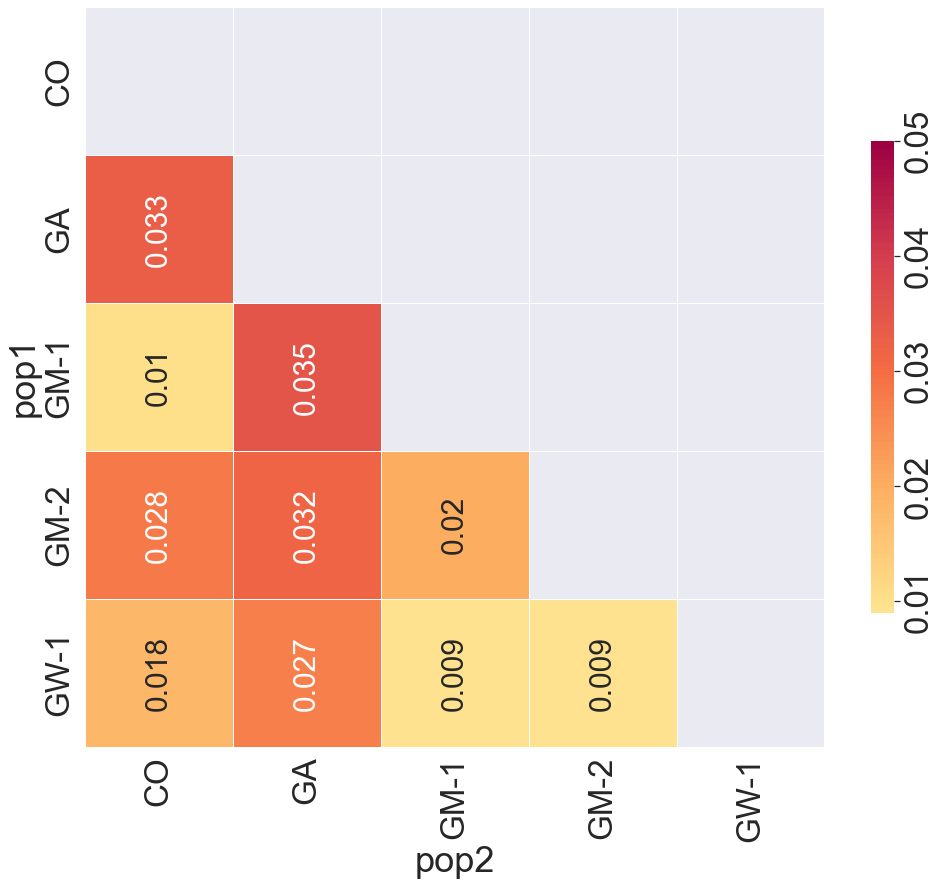

In [99]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.color_palette("Spectral_r", n_colors=3, as_cmap=True)
ax.invert_yaxis()
# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(df, mask=mask, cmap=cmap, vmax=.05, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size":30, "rotation":90})
cbar = heatmap.collections[0].colorbar
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=90)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=90)
#sns.set(font_scale = 3)
cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), rotation=90, va='center')
plt.tight_layout()
f.savefig('fst.png', jpeg_quality=100, dpi=200)

-----------------------------------